## Курсовая работа №1

In [84]:
%matplotlib inline
import numpy as np
import pandas as pd
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns
from datetime import datetime, date
import warnings; warnings.filterwarnings(action='once')

large = 22; med = 16; small = 12
params = {'axes.titlesize': med,
          'legend.fontsize': med,
          'figure.figsize': (16, 10),
          'axes.labelsize': med,
          'axes.titlesize': med,
          'xtick.labelsize': small,
          'ytick.labelsize': small,
          'figure.titlesize': large}
plt.rcParams.update(params)
plt.style.use('seaborn-whitegrid')
sns.set_style("white")

## 1. Описание и начальная работа с данными

**Формируем основной датасет:**

In [2]:
main = pd.read_csv('data/courses.csv')
main.rename(columns={'id': 'course_id'}, inplace=True)
course_contents = pd.read_csv('data/course_contents.csv')
progresses = pd.read_csv('data/progresses.csv')
progresses.rename(columns={'id': 'progress_id'}, inplace=True)
progress_phases = pd.read_csv('data/progress_phases.csv')
main = pd.merge(main, course_contents, on = 'course_id')
main = pd.merge(main, progresses, on = 'course_id')
main = pd.merge(main, progress_phases, on = ['progress_id', 'module_number', 'lesson_number'])
del main['Unnamed: 0']
main['start_date'] = pd.to_datetime(main.start_date).dt.floor('D')
main['start_year_month'] = main['start_date'].dt.to_period("M")
main['finish_date'].fillna('2019-07-31 23:59:59.029132+00', inplace=True)
main['finish_date'] = pd.to_datetime(main.finish_date, utc=True)
main['finish_year_month'] = main['finish_date'].dt.to_period("M")
main['delta_year'] = main['finish_date'].dt.year - main['start_date'].dt.year
main['delta_month'] = main['finish_date'].dt.month - main['start_date'].dt.month
main.head()

d:\python\python3\lib\site-packages\pandas\core\arrays\datetimes.py:1143: UserWarning: Converting to PeriodArray/Index representation will drop timezone information.
  warnings.warn(


,course_id,title,field,module_number,module_title,lesson_number,lesson_title,lesson_token,is_video,is_homework,progress_id,student_id,status,start_date,finish_date,start_year_month,finish_year_month,delta_year,delta_month
0,943306102e5b067d08a29094f37b8193,Java-разработчик c нуля,Development,1,Вводный модуль,1,Какие бывают программы,cf394764-8850-4a0a-8d02-03470fe5345c,True,False,45cdf025b87db75e84f93c4ac3ccb5c7,0b4656b84ca60350583f8fbe236dda86,done,2019-03-29 00:00:00+00:00,2019-04-13 17:32:19.134874+00:00,2019-03,2019-04,0,1
1,943306102e5b067d08a29094f37b8193,Java-разработчик c нуля,Development,1,Вводный модуль,1,Какие бывают программы,cf394764-8850-4a0a-8d02-03470fe5345c,True,False,0c56109dde49080e7441e95b22bb73c2,1d874e6b6bdc34559781f65f9f761791,done,2019-06-13 00:00:00+00:00,2019-06-13 19:51:21.987534+00:00,2019-06,2019-06,0,0
2,943306102e5b067d08a29094f37b8193,Java-разработчик c нуля,Development,1,Вводный модуль,1,Какие бывают программы,cf394764-8850-4a0a-8d02-03470fe5345c,True,False,36079c0615d85f3cebfa47542b43ab41,ab7f5c720e3a5e1de00c2cdbef19fbf0,done,2019-03-27 00:00:00+00:00,2019-03-27 06:56:54.834751+00:00,2019-03,2019-03,0,0
3,943306102e5b067d08a29094f37b8193,Java-разработчик c нуля,Development,1,Вводный модуль,1,Какие бывают программы,cf394764-8850-4a0a-8d02-03470fe5345c,True,False,37384cbeb141835cc61b5fd22abd9200,29ab3f8c52a858bea2d3b9a51c433578,done,2019-05-28 00:00:00+00:00,2019-05-29 06:47:21.794092+00:00,2019-05,2019-05,0,0
4,943306102e5b067d08a29094f37b8193,Java-разработчик c нуля,Development,1,Вводный модуль,1,Какие бывают программы,cf394764-8850-4a0a-8d02-03470fe5345c,True,False,3a79d622c4057c1c029c74e282e43396,72afe01498ba14045467fc32029b650c,done,2019-03-24 00:00:00+00:00,2019-03-24 09:50:32.595199+00:00,2019-03,2019-03,0,0


**Общее количество курсов:**

In [3]:
main['course_id'].nunique()

15

**Количество модулей на каждом курсе:**

In [4]:
main.groupby('title')['module_title'].nunique().sort_values()

title
PHP-разработчик с 0 до PRO. Часть 1     8
Веб-вёрстка для начинающих 2.0          8
Excel Базовый                           9
Java-разработчик c нуля                 9
SMM-маркетолог от А до Я               11
Java-разработчик                       17
Веб-дизайн PRO 2.0                     17
Веб-дизайн Базовый                     17
Руководитель digital-проектов          17
JavaScript с нуля                      18
Интернет-маркетолог от Ingate          18
Веб-дизайн с нуля 2.0                  19
UX-дизайн                              20
Веб-разработчик                        20
Анимация интерфейсов                   21
Name: module_title, dtype: int64

**Количество уроков в каждом модуле на каждом курсе:**

In [77]:
main.groupby(['title','module_title'])['lesson_title'].nunique()

title                          module_title                                       
Excel Базовый                   Визуализация данных Excel                              5
                               Основной функционал Excel                              11
                               Основной функционал Excel (продолжение)                 7
                               Сводные таблицы Excel                                   5
                               Формулы и функции Excel. Более сложные формулы          5
                                                                                      ..
Руководитель digital-проектов  Решение факапов. Lean/TOC. Обзор.                       5
                               Требовательность digital-продюсера                      4
                               Управление временем                                     4
                               Управление дизайнерами. Разработка дизайна по scrum     7
                           

**Медианное количество уроков в модуле на каждом курсе:**

In [75]:
temp_df = main.groupby(['title','module_title'],as_index=False)['lesson_title'].nunique()
temp_df.groupby('title')['lesson_title'].median()

title
Excel Базовый                           5.0
Java-разработчик                        7.0
Java-разработчик c нуля                10.0
JavaScript с нуля                       7.0
PHP-разработчик с 0 до PRO. Часть 1     4.0
SMM-маркетолог от А до Я                6.0
UX-дизайн                               3.5
Анимация интерфейсов                    3.0
Веб-вёрстка для начинающих 2.0          7.0
Веб-дизайн PRO 2.0                      5.0
Веб-дизайн Базовый                      3.0
Веб-дизайн с нуля 2.0                   4.0
Веб-разработчик                         2.0
Интернет-маркетолог от Ingate           6.5
Руководитель digital-проектов           5.0
Name: lesson_title, dtype: float64

**Количество учеников на каждом курсе:**

In [78]:
main.groupby('title')['student_id'].agg('nunique').sort_values()

title
SMM-маркетолог от А до Я                506
Веб-дизайн Базовый                      518
Java-разработчик c нуля                 581
Анимация интерфейсов                    598
Веб-разработчик                         628
Руководитель digital-проектов           685
Java-разработчик                        763
Excel Базовый                           782
PHP-разработчик с 0 до PRO. Часть 1     854
JavaScript с нуля                       966
UX-дизайн                              1151
Веб-дизайн PRO 2.0                     1711
Веб-вёрстка для начинающих 2.0         2004
Веб-дизайн с нуля 2.0                  2014
Интернет-маркетолог от Ingate          2168
Name: student_id, dtype: int64

**Общее количество студентов на платформе:**

In [79]:
main.groupby('title')['student_id'].agg('nunique').sum()

15929

**Минимальный, максимальный, средний, медианный возраст студентов:**

In [82]:
students = pd.read_csv('data/students.csv')
students['age'] = datetime.today()
students['birthday'] = pd.to_datetime(students['birthday'], errors='coerce')
# Вычисляем возраст студентов
students['age'] = (students['age'] - students['birthday']) / np.timedelta64(1,'Y')
# Заполняем пустые значения нулями
students = students.fillna(0)
# Отбрасываем дробную часть
students['age'] =np.floor(students['age'])
# Группируем датафрейм по условию и вычисляем необходимые метрики
students[(students['age']>10) & (students['age']<90)].agg({'age': {'min','max','mean', 'median'}})

,age
median,30.000000
min,11.000000
mean,30.703946
max,86.000000


**1.2 Bar-chart, отражающий количество студентов на каждом курсе**

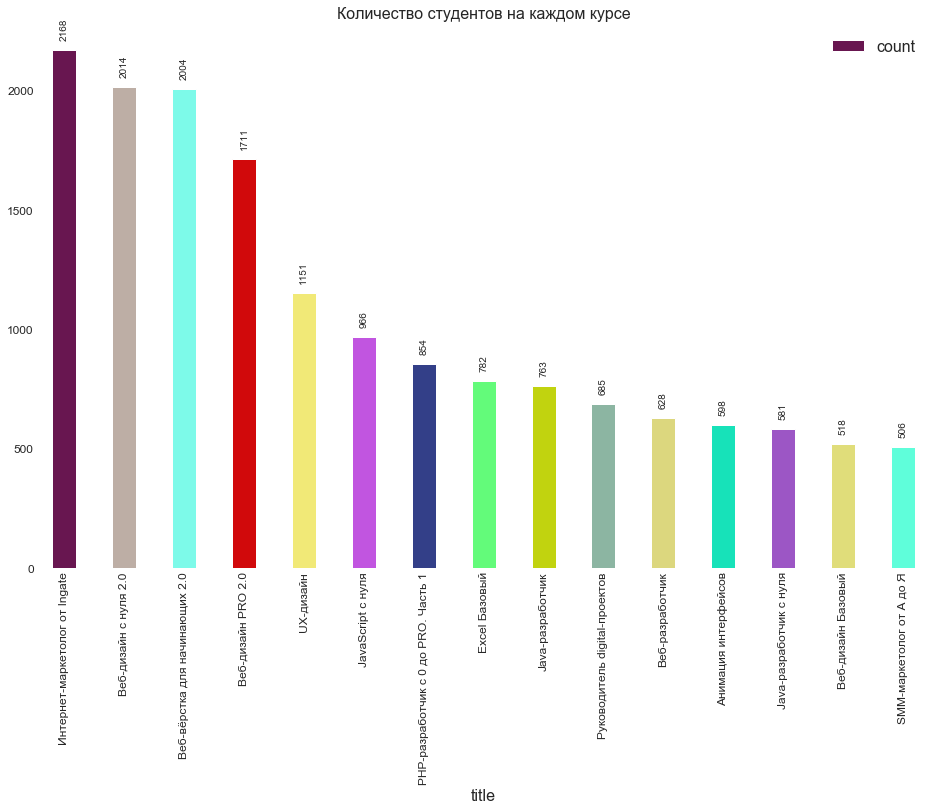

In [85]:
chart_st = pd.DataFrame(main.groupby(['field','title'])['student_id'].nunique())
chart_st.reset_index(inplace=True)      
chart_st.rename(columns={'student_id': 'count'}, inplace=True)
chart_st = chart_st.sort_values(['count'], ascending=False)
ax = chart_st.plot.bar(x='title', y='count', rot=90, width = 0.4, color = np.random.rand(15, 3))
# Подписываем график
plt.title('Количество студентов на каждом курсе')
# Подписываем столбцы
for i, val in enumerate(chart_st['count']):
    ax.text(i, val+50, val, horizontalalignment='center', rotation = 90,
        fontsize = 10 )
# Убираем рамку
for spine in plt.gca().spines.values(): 
    spine.set_visible(False)

**1.3 Горизонтальный bar-chart, отражающий количество студентов на каждом курсе**

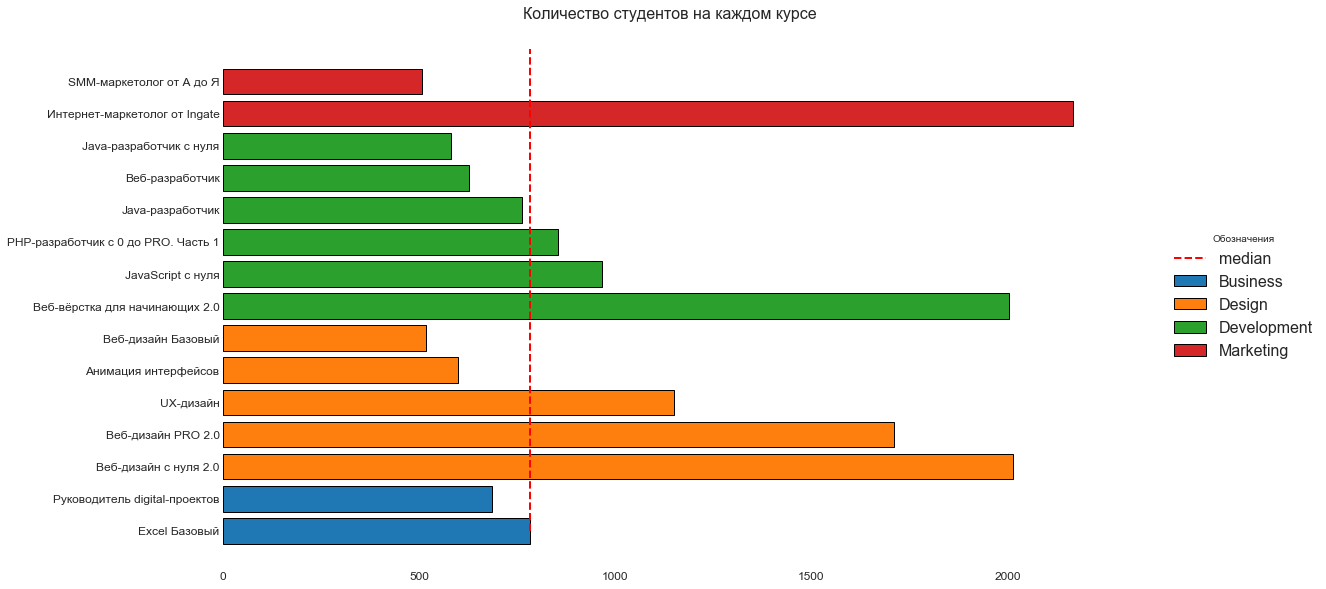

In [87]:
# Формуриуем объект Series c количеством студентов на каждом курсе
st_count = chart_st.groupby('field')['title'].unique()
# Строим bar-chart с группировкой по направлениям
for i,val in enumerate(st_count):
    label  = st_count.index[i]
    df = chart_st[chart_st['field']== st_count.index[i]]
    df = df.sort_values(['count'], ascending=False)
    plt.barh(df['title'], df['count'], edgecolor = 'k', label = label)
#Заголовок
plt.title('Количество студентов на каждом курсе')
# Рисуем медиану
plt.vlines(x= chart_st['count']
           .median(axis=0), ymin = 0, ymax= 15, linestyle = '--',linewidth = 2, color = 'r', label = 'median') 
# Убираем рамку
for spine in plt.gca().spines.values(): 
    spine.set_visible(False)
# Легенда
plt.legend(      
           loc="center right",        
           borderaxespad=4,         
           title="Обозначения", bbox_to_anchor=(1.3, 0.5), framealpha = 0.1)

**Описание полученных метрик:**
    
    
    
    
    
    
    
    
    
    
    
    
    

На платформе представлено 15 курсов по 4 направлениям, таким как бизнес, дизайн, программирование и маркетинг.  
Максимальное количество модулей  у курса "Анимация интерфейсов - 15 модулей, минимальное количество модулей у курсов 
"PHP-разработчик с 0 до PRO" и "Веб-вёрстка для начинающих 2.0" - по 8 модулей.  
Количество уроков в модулях курсов варьируется от 3 до 29.   
Медианное количество уроков в модулях курсов - 3.  
Самым популярным курсом является "Интернет-маркетолог от Ingate" - 2168 студентов.  
Самый немногочисленный курс "SMM-маркетолог от А до Я"  - 506 студентов.  
Всего на платформе обучается 15929 студентов.  
Минимальный возраст студентов 11 лет, медианный и средний возраст 29 лет, максимальный  возраст 89 лет.  
Самые популярные курсы по направлениям:  
маркетинг - "Интернет-маркетолог от Ingate" (2168 чел.);  
программирование - "Веб-вёрстка для начинающих 2.0" (2004 чел.);  
дизайн - "Веб-дизайн с нуля 2.0" (2014 чел.);  
бизнес - "Excel Базовый" (782 чел.)

## 2. Расчет потенциальной нагрузки на преподавателей

**2.1 Расчет прироста студентов на каждом курсе в каждом месяце за всю историю**

In [99]:
# Формируем новый датафрейм для отображения прироста
sub_df = main[['start_year_month', 'title', 'module_number','student_id','is_homework']][main['is_homework']==True] 
a1 = sub_df.groupby(['start_year_month','title' ],as_index = False).agg({'student_id':'nunique'})
a2 = sub_df[(sub_df['module_number']==1)].groupby(['start_year_month','title'],as_index = False).agg({'student_id':'nunique'})\
             .rename(columns = {'student_id':'increase'})
increase = pd.merge(a1, a2,on = ['start_year_month','title'], how = 'outer')
# Датафрейм  для курса 'Веб-дизайн Базовый'
a3 = sub_df[(sub_df['module_number']==3)&(sub_df.title =='Веб-дизайн Базовый')].groupby(['start_year_month','title'],as_index = False)\
           .agg({'student_id':'nunique'}).rename(columns = {'student_id':'increase'})
increase = pd.merge(increase,a3, on=['start_year_month','title'],how ='outer')
increase['str_date'] = increase['start_year_month'].astype(str)
increase[['increase_x','increase_y']] = increase[['increase_x','increase_y']].fillna(0)
increase['increase'] = increase['increase_x']+increase['increase_y']
increase = increase.drop(columns =['increase_x', 'increase_y'])
increase

,start_year_month,title,student_id,str_date,increase
0,2016-03,Веб-разработчик,1,2016-03,1.0
1,2016-11,UX-дизайн,2,2016-11,2.0
2,2017-02,UX-дизайн,1,2017-02,0.0
3,2017-03,Веб-дизайн Базовый,2,2017-03,2.0
4,2017-04,UX-дизайн,1,2017-04,1.0
...,...,...,...,...,...
246,2019-07,Веб-дизайн Базовый,13,2019-07,2.0
247,2019-07,Веб-дизайн с нуля 2.0,343,2019-07,76.0
248,2019-07,Веб-разработчик,12,2019-07,4.0
249,2019-07,Интернет-маркетолог от Ingate,276,2019-07,91.0


**Графики с приростом студентов в каждом месяце для каждого курса**

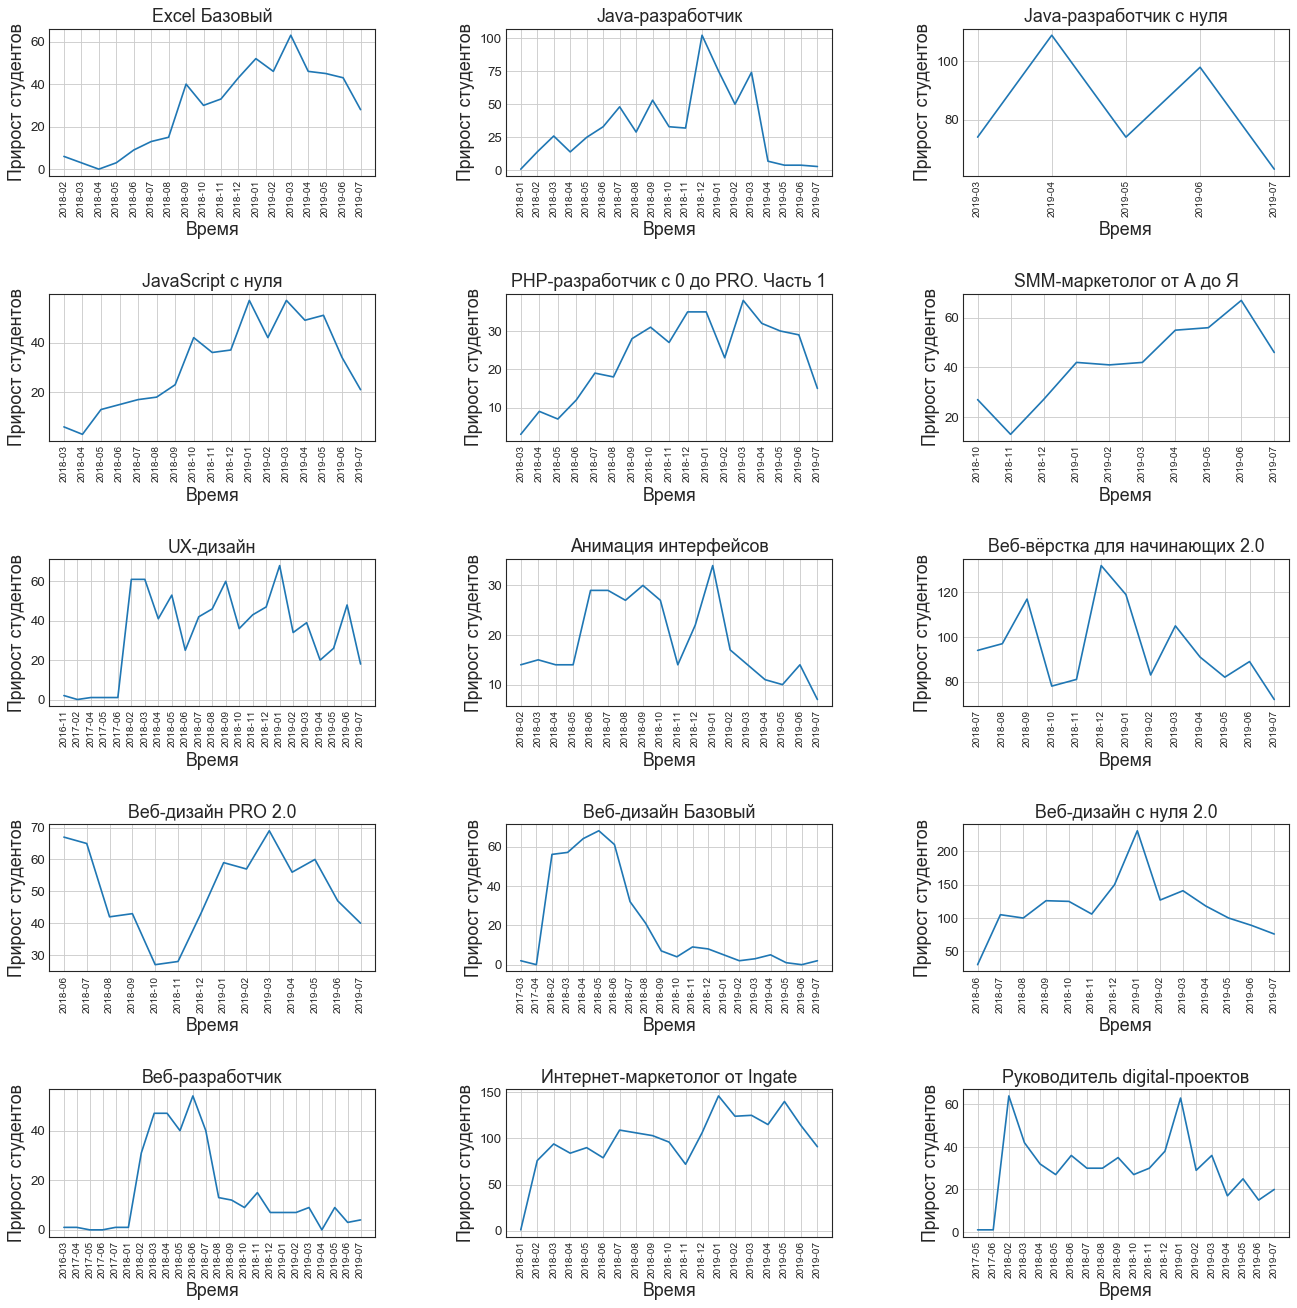

In [100]:
chart_inc = increase.pivot_table(index = 'str_date', columns = 'title', values = 'increase', fill_value = 0)
fig = plt.figure(figsize=(20, 20), dpi=80)
for i,val in enumerate(chart_inc):
    df = increase[increase['title']== chart_inc.columns[i]]
    ax = fig.add_subplot(5, 3, i+1)
    ax.plot(df['str_date'], df['increase'])
    ax.set_xlabel('Время')
    ax.set_ylabel('Прирост студентов')
    ax.set_xticklabels(df['str_date'], rotation=90, fontdict={'fontsize':9})
    ax.grid()
    plt.title(chart_inc.columns[i])
plt.subplots_adjust(wspace=0.4, hspace=0.8)

**График прироста студентов в каждом месяце для каждого курса**

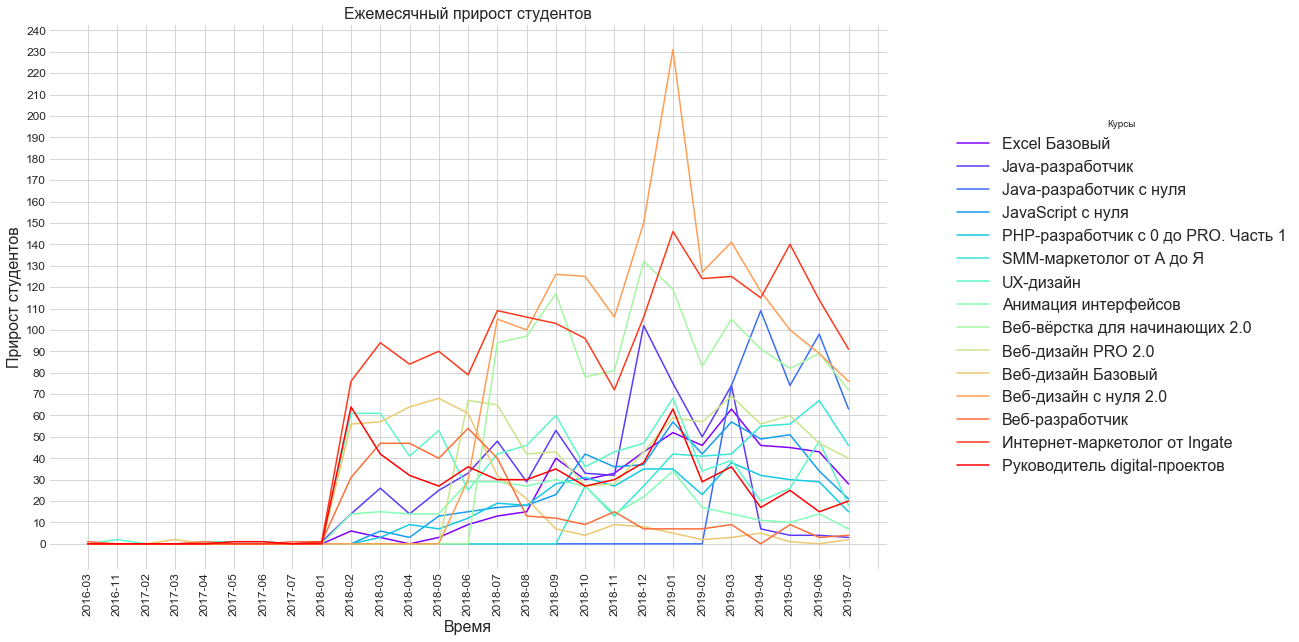

In [101]:
chart_inc1 = chart_inc.plot(cmap='rainbow',figsize=(15,10))
chart_inc1.grid(True, linewidth = 0.9, alpha=0.9  )
plt.legend(      
           loc="center right",  title="Курсы",    
           borderaxespad=6,         
           bbox_to_anchor=(1.6, 0.5), framealpha = 0.1)
plt.title("Ежемесячный прирост студентов")
chart_inc1.set_xlabel('Время')
chart_inc1.set_ylabel('Прирост студентов')
x = increase['start_year_month'].unique().astype(str)
new = sorted(x)
plt.xticks(np.arange(0,increase['start_year_month'].nunique()+1),new, rotation=90)
plt.yticks(range(0,250,10), labels = range(0,250,10))
#Убираем рамки графика
chart_inc1.spines["top"].set_visible(False)
chart_inc1.spines["right"].set_visible(False)
chart_inc1.spines["bottom"].set_visible(False)
chart_inc1.spines["left"].set_visible(False)

**2.4 Количество прогрессов по выполнению домашних работ в каждом месяце за всю историю**

In [102]:
# Создаем датафрейм из основного датафрейма, оставляя модули, в которых есть ДЗ
sub_main = main[main.is_homework==True]
# Cоздаем два даафрейма, с начатыми ДЗ и с одобренными ДЗ
start = sub_main.groupby(['start_year_month','title' ],as_index = False).agg({'status':'count'})\
.rename(columns = {'status':'one_month'})
done = sub_main[(sub_main['status'] == 'done')] \
       .groupby(['finish_year_month','title' ],as_index = False).agg({'status':'count'})\
.rename(columns = {'status':'status_done','finish_year_month':'start_year_month'})
# Объединяем созданные ранее датафреймы start и done
progress = pd.merge(start, done, on = ['start_year_month','title'])
progress['str_start'] = progress['start_year_month'].astype(str)
progress['diff'] = progress['one_month'] - progress['status_done']
progress = progress.sort_values(['title','start_year_month'])
# Создаем объект Series, со списками прогрессов по каждому курсу
support_lst= progress.groupby('title')['diff'].apply(lambda x:x.to_list())
# Делаем ряд преобразований для получения столбца over_month(ДЗ, которые начаты и не закончены в одном месяце)
new = []
for elem in support_lst:
    elem.insert(0,0)
    elem = elem[:-1]
    for i,val in enumerate(elem):
        if i==0:
            new.append(val)
        else:
            new.append(elem[i]+new[i-1])
progress['over_month'] = new
progress['progress'] = progress['one_month'] + progress['over_month']
progress =  progress.drop(columns =['status_done', 'diff','over_month','one_month']).rename(columns = {'str_date':'date_porgress'})
progress

,start_year_month,title,str_start,progress
15,2018-02,Excel Базовый,2018-02,37
23,2018-03,Excel Базовый,2018-03,9
32,2018-04,Excel Базовый,2018-04,16
42,2018-05,Excel Базовый,2018-05,21
52,2018-06,Excel Базовый,2018-06,41
...,...,...,...,...
187,2019-03,Руководитель digital-проектов,2019-03,487
202,2019-04,Руководитель digital-проектов,2019-04,446
217,2019-05,Руководитель digital-проектов,2019-05,487
232,2019-06,Руководитель digital-проектов,2019-06,515


**Графики количества прогрессов по выполнению домашних работ на каждом курсе**

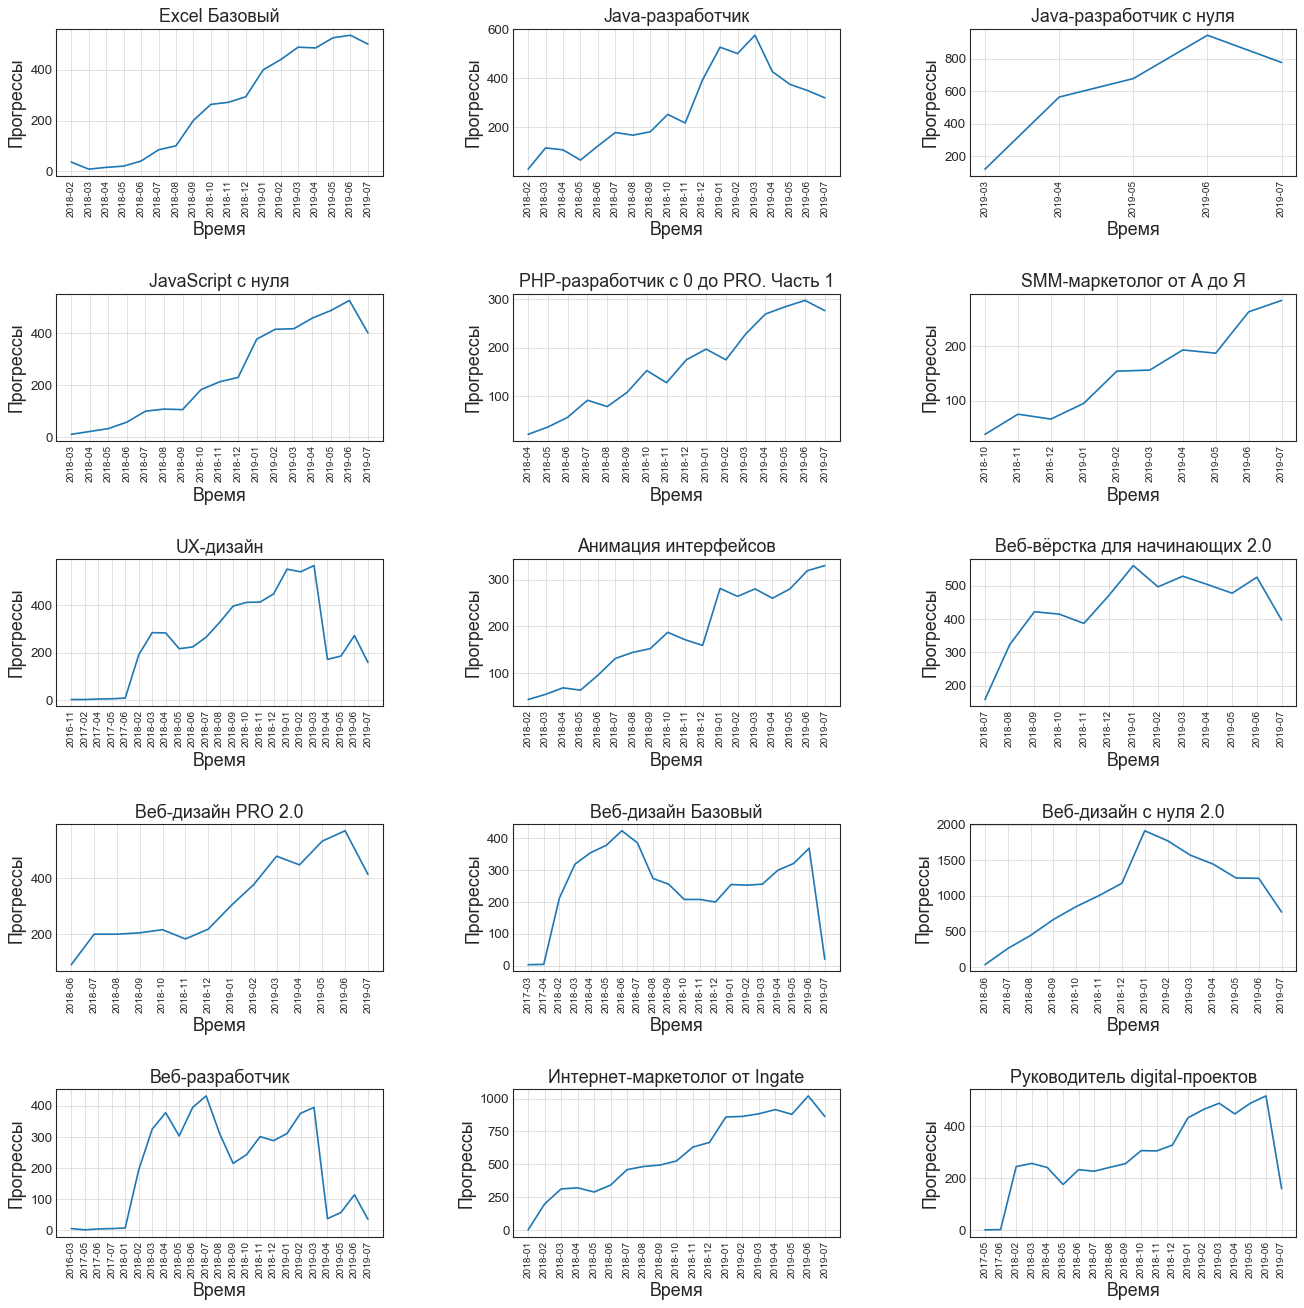

In [104]:
#Создаем сводную таблицу, для отрисовки графиков
chart_progr = progress.pivot_table(index = 'str_start', columns = 'title', values = 'progress')
fig = plt.figure(figsize=(20, 20), dpi=80)
for i,val in enumerate(chart_progr):
    df = progress[progress['title']== chart_progr.columns[i]]
    ax = fig.add_subplot(5, 3, i+1)
    ax.plot(df['str_start'], df['progress'])
    ax.set_xlabel('Время')
    ax.set_ylabel('Прогрессы')
    ax.set_xticklabels(df['str_start'], rotation=90, fontdict={'fontsize':9})
    ax.grid(linewidth = 0.5 )
    plt.title(chart_progr.columns[i])
plt.subplots_adjust(wspace=0.4, hspace=0.8)

**График с количеством прогрессов домашних заданий по каждому курсу**

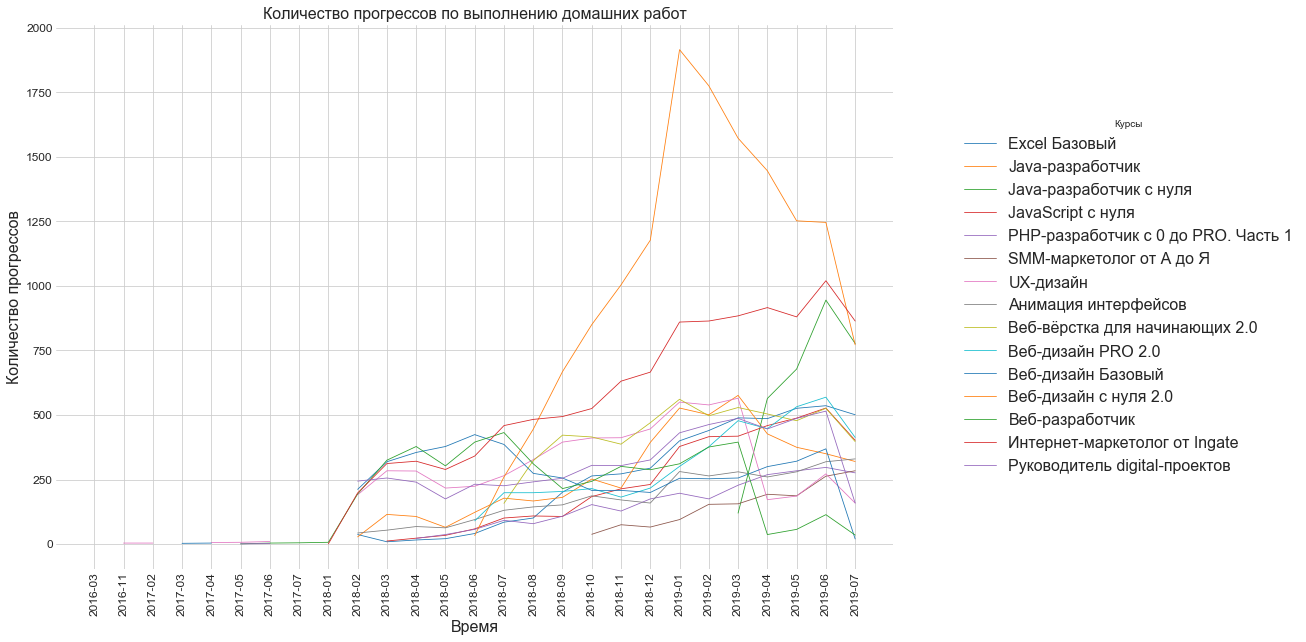

In [105]:
graph = chart_progr.plot(figsize=(15,10), linewidth=0.8)
graph.grid(True)
plt.legend(      
           loc="center right",  title="Курсы",    
           borderaxespad=6,         
           bbox_to_anchor=(1.6, 0.5), framealpha = 0.1)
plt.title("Количество прогрессов по выполнению домашних работ")
graph.set_xlabel('Время')
graph.set_ylabel('Количество прогрессов')
months = progress['start_year_month'].unique().astype(str)
months = sorted(months)
plt.xticks(range(0,27),months,rotation=90)
#Убираем рамки графика
graph.spines["top"].set_visible(False)
graph.spines["right"].set_visible(False)
graph.spines["bottom"].set_visible(False)
graph.spines["left"].set_visible(False)


**Описание полученных метрик:**

In [107]:
#Создадим датафрейм, отображающий максимальный прирост и максимальное количество прогрессов на каждом курсе с указанием даты
metrics = increase.groupby(['title'],as_index= False).agg({'increase':'max'})
metrics =  pd.merge(increase, metrics, on = ['title','increase'])
metrics  = metrics.rename(columns = {'str_date':'date_increase'})
progress1 = progress.rename(columns = {'str_start':'date_progress'})
metric_prog = progress1.groupby(['title'],as_index= False).agg({'progress':'max'})
metric_prog =  pd.merge(progress1, metric_prog, on = ['title','progress'])
del metric_prog['start_year_month']
metrics = pd.merge( metrics, metric_prog, on = 'title')
metrics['date_increase']= pd.to_datetime(metrics['date_increase'])
metrics['date_progress']= pd.to_datetime(metrics['date_progress'])
metrics['delta_time'] = metrics['date_progress'] - metrics['date_increase']
metrics =  metrics.drop(columns =['start_year_month', 'student_id'])
metrics

,title,date_increase,increase,date_progress,progress,delta_time
0,Руководитель digital-проектов,2018-02-01,64.0,2019-06-01,515,485 days
1,Веб-дизайн Базовый,2018-05-01,68.0,2018-06-01,424,31 days
2,Веб-разработчик,2018-06-01,54.0,2018-07-01,432,30 days
3,Java-разработчик,2018-12-01,102.0,2019-03-01,576,90 days
4,Веб-вёрстка для начинающих 2.0,2018-12-01,132.0,2019-01-01,561,31 days
5,JavaScript с нуля,2019-01-01,57.0,2019-06-01,527,151 days
6,JavaScript с нуля,2019-03-01,57.0,2019-06-01,527,92 days
7,UX-дизайн,2019-01-01,68.0,2019-03-01,565,59 days
8,Анимация интерфейсов,2019-01-01,34.0,2019-07-01,330,181 days
9,Веб-дизайн с нуля 2.0,2019-01-01,231.0,2019-01-01,1915,0 days


In [108]:
metrics['delta_time'].median()

Timedelta('91 days 00:00:00')

По полученным данным видно, что число прогрессов по домашним заданиям достигает максимума через 91 день(медианное знчение) после максимального прироста студентов. 

In [109]:
#Датафрейм, отображающий минимальный прирост и минимальное количество прогрессов на каждом курсе с указанием даты
metrics_min = increase.groupby(['title'],as_index= False).agg({'increase':'min'})
metrics_min =  pd.merge(increase, metrics_min, on = ['title','increase'])
metrics_min  = metrics_min.rename(columns = {'str_date':'date_increase'})
progress2 = progress.rename(columns = {'str_start':'date_progress'},)
metric_prog1 = progress2.groupby(['title'],as_index= False).agg({'progress':'min'})
metric_prog1 =  pd.merge(progress2, metric_prog1, on = ['title','progress'])
del metric_prog1['start_year_month'] 
metrics_min = pd.merge(metrics_min, metric_prog1, on = 'title')
metrics_min =  metrics_min.drop(columns =['start_year_month', 'student_id'])
metrics_min

,title,date_increase,increase,date_progress,progress
0,UX-дизайн,2017-02,0.0,2016-11,4
1,UX-дизайн,2017-02,0.0,2017-02,4
2,Веб-дизайн Базовый,2017-04,0.0,2017-03,3
3,Веб-дизайн Базовый,2019-06,0.0,2017-03,3
4,Веб-разработчик,2017-05,0.0,2017-05,1
5,Веб-разработчик,2017-06,0.0,2017-05,1
6,Веб-разработчик,2019-04,0.0,2017-05,1
7,Руководитель digital-проектов,2017-05,1.0,2017-05,1
8,Руководитель digital-проектов,2017-06,1.0,2017-05,1
9,Java-разработчик,2018-01,1.0,2018-02,28


## 3. Выявление проблемных модулей

In [110]:
problems = main[(main['is_homework']==True) & (main['status']== 'done')]\
.groupby(['title', 'module_title', 'progress_id','module_number'],as_index =False) \
.agg({'start_date':'min','finish_date': 'max'}).rename(columns = {'start_date':'begin', 'finish_date':'end'})
problems['duration'] = (problems['end'] - problems['begin'])/np.timedelta64(1,'D')
problems['months_number'] = problems['begin'].dt.month
problems['months'] = problems['begin'].dt.month_name()
problems

,title,module_title,progress_id,module_number,begin,end,duration,months_number,months
0,Excel Базовый,Визуализация данных Excel,01913637c65f73ec70b5d4affbcc61bf,7,2018-09-11 00:00:00+00:00,2018-09-11 15:56:31.236461+00:00,0.664250,9,September
1,Excel Базовый,Визуализация данных Excel,04d836fd9de6af94813dedc0a4ecadc9,7,2019-05-17 00:00:00+00:00,2019-05-20 03:30:20.951609+00:00,3.146076,5,May
2,Excel Базовый,Визуализация данных Excel,0559656ca0e1ad39a287df644e9800e9,7,2018-11-01 00:00:00+00:00,2018-11-13 10:40:59.042351+00:00,12.445128,11,November
3,Excel Базовый,Визуализация данных Excel,081d8b3518378de2afd20f75c13f0c3e,7,2019-04-07 00:00:00+00:00,2019-04-21 02:43:41.141964+00:00,14.113671,4,April
4,Excel Базовый,Визуализация данных Excel,0a350a8879c68e1b7d50e54dc21aec1b,7,2018-11-16 00:00:00+00:00,2018-11-21 10:58:39.606151+00:00,5.457403,11,November
...,...,...,...,...,...,...,...,...,...
43422,Руководитель digital-проектов,Экологичный путь менеджера,fddf2363e5862573523d1a31711b0c12,1,2018-03-16 00:00:00+00:00,2018-03-22 03:43:57.649853+00:00,6.155528,3,March
43423,Руководитель digital-проектов,Экологичный путь менеджера,fe62061327a1c947b29cfbf916c52163,1,2018-08-14 00:00:00+00:00,2018-08-21 10:41:36.485864+00:00,7.445561,8,August
43424,Руководитель digital-проектов,Экологичный путь менеджера,ff183958a84aafcab665132f83e50adc,1,2019-03-01 00:00:00+00:00,2019-03-06 08:40:55.581398+00:00,5.361754,3,March
43425,Руководитель digital-проектов,Экологичный путь менеджера,ff34c60d396b7e59fec55e60f4d8039b,1,2018-03-30 00:00:00+00:00,2018-04-03 05:16:58.247274+00:00,4.220119,3,March


**Минимальное, максимальное, среднее, медианное время прохождения каждого модуля**

In [111]:
min_max = problems.groupby(['title', 'module_title','module_number'],as_index =False).agg({'duration':['max','min', 'mean','median']})
min_max

title  \
                                     
0                    Excel Базовый   
1                    Excel Базовый   
2                    Excel Базовый   
3                    Excel Базовый   
4                    Excel Базовый   
..                             ...   
185  Руководитель digital-проектов   
186  Руководитель digital-проектов   
187  Руководитель digital-проектов   
188  Руководитель digital-проектов   
189  Руководитель digital-проектов   

                                          module_title module_number  \
                                                                       
0                            Визуализация данных Excel             7   
1                            Основной функционал Excel             1   
2              Основной функционал Excel (продолжение)             2   
3                                Сводные таблицы Excel             8   
4       Формулы и функции Excel. Более сложные формулы             5   
..                                                 ...           ...   
185                  Решение факапов. Lean/TOC. Обзор.            12   
186                 Требовательность digital-продюсера             3   
187                                Управление временем             9   
188  Управление дизайнерами. Разработка дизайна по ...            14   
189                         Экологичный путь менеджера             1   

       duration                                 
            max       min       mean    median  
0    175.256372  0.301034  10.494236  5.351498  
1    184.247461  0.301032   6.584915  2.892879  
2    185.109275  0.176442   4.892225  2.431770  
3    239.631098  0.301035  10.042743  3.447213  
4    176.135739  0.301033   7.905152  3.544742  
..          ...       ...        ...       ...  
185  212.167968  0.320792  21.757301  7.387505  
186  397.241120  0.309925  18.062697  8.335329  
187  164.378207  0.321663   8.204798  4.395602  
188  199.398976  0.321666  15.111825  8.277739  
189  246.387934  0.204512   6.476468  3.257890  

[190 rows x 7 columns]

**Line-graph с медианным временем прохождения каждого модуля для каждого курса**

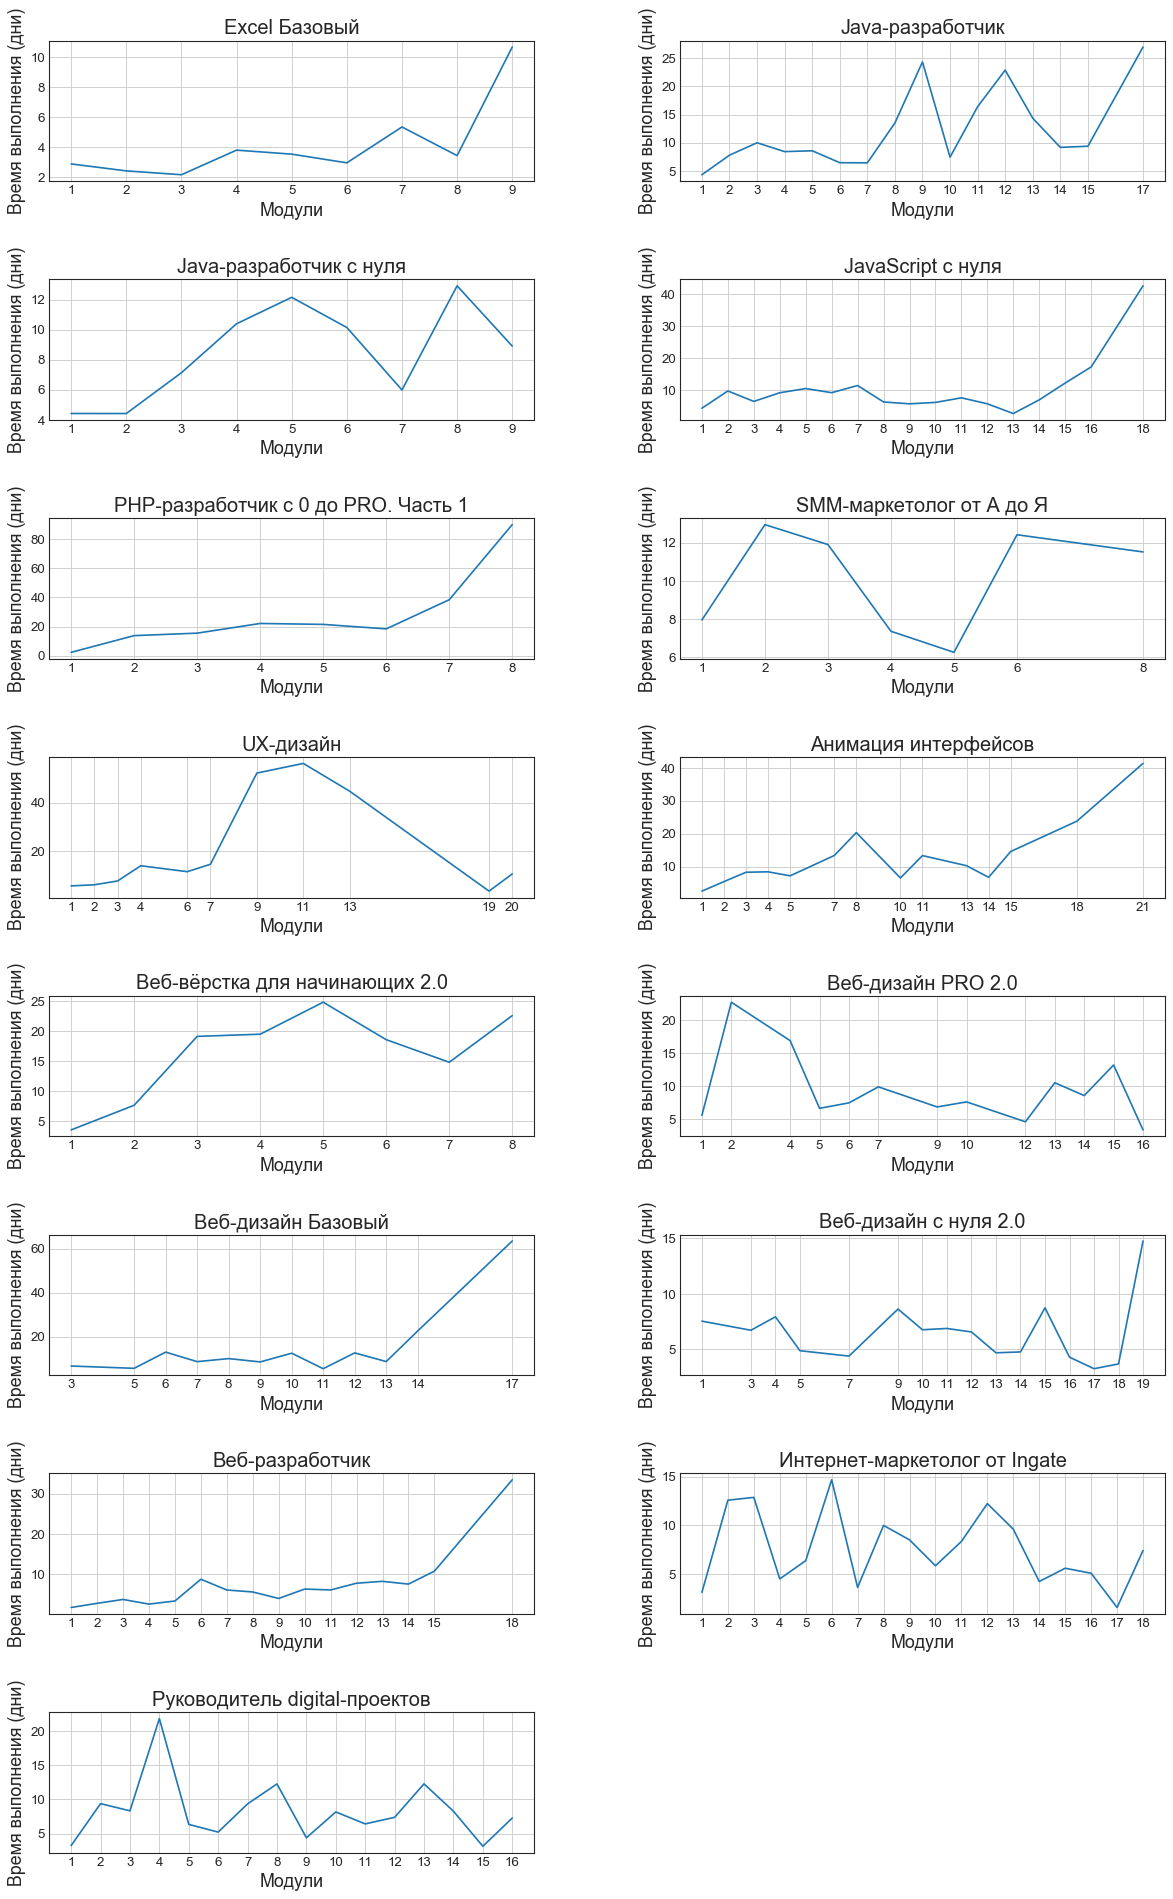

In [112]:
median_time = problems.groupby(['title', 'module_number'], as_index = False).agg({'duration': 'median'})
#median_time = median_time.sort_values(['module_number','title'])
median_time_pivot = median_time.pivot_table(index = 'module_number', columns = 'title', values = 'duration')
fig = plt.figure(figsize=(18, 30), dpi=80)
for i,val in enumerate(median_time_pivot):
    df = median_time[median_time['title']== median_time_pivot.columns[i]]
    ax = fig.add_subplot(8, 2, i+1)
    ax.plot(df['module_number'], df['duration'])
    ax.set_ylabel('Время выполнения (дни)')
    ax.set_xlabel('Модули')
    plt.xticks(df['module_number'])
    ax.grid(linewidth = 0.8 )
    plt.title(median_time_pivot.columns[i],fontdict={'fontsize':18})
plt.subplots_adjust(wspace=0.3, hspace = 0.7)

**Медианное время выполнения домашней работы по месяцам (12 месяцев, январь-декабрь) для каждого курса**

In [114]:
seasons = problems.groupby(['title', 'months_number','months'], as_index = False). \
           agg({'duration': 'median'}).sort_values('months_number')
seasons

,title,months_number,months,duration
0,Excel Базовый,1,January,2.837212
41,PHP-разработчик с 0 до PRO. Часть 1,1,January,12.407892
53,SMM-маркетолог от А до Я,1,January,12.949897
159,Руководитель digital-проектов,1,January,6.224053
63,UX-дизайн,1,January,10.418825
...,...,...,...,...
98,Веб-вёрстка для начинающих 2.0,12,December,9.269371
110,Веб-дизайн PRO 2.0,12,December,14.765800
122,Веб-дизайн Базовый,12,December,18.207208
52,PHP-разработчик с 0 до PRO. Часть 1,12,December,8.623842


**Line-graph с медианным временем выполнения домашней работы по месяцам**

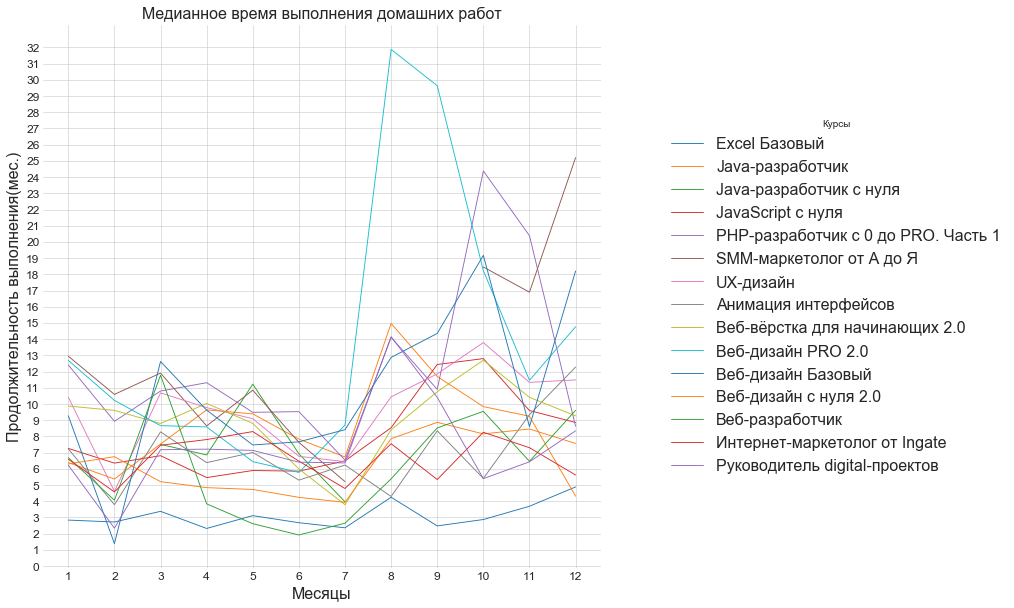

In [115]:
seasons_pivot = seasons.pivot_table(index = 'months_number', columns = 'title', values = 'duration')
homework = seasons_pivot.plot(linewidth = 0.9,figsize=(10,10))
homework.grid(True,linewidth = 0.6 )
plt.legend(      
           loc="center right",  title="Курсы",    
           borderaxespad=6,         
           bbox_to_anchor=(1.9, 0.5), framealpha = 0.1)
plt.title("Медианное время выполнения домашних работ")
homework.set_xlabel('Месяцы')
homework.set_ylabel('Продолжительность выполнения(мес.)')
maximum = int(seasons['duration'].max())
plt.xticks(range(1,13),range(1,13))
plt.yticks(range(0,maximum+2,1),range(0,maximum+2,1))
#Убираем рамки графика
homework.spines["top"].set_visible(False)
homework.spines["right"].set_visible(False)
homework.spines["bottom"].set_visible(False)
homework.spines["left"].set_visible(False)

**Описание полученных метрик:**

Проблемные модули на каждом курсе(примем во внимание модули на выполнение которых понадобилось более 7 дней, за исключением экзаменационных работ):   
PHP-разработчик с 0 до PRO. Часть 1    7 модуль  
Веб-вёрстка для начинающих 2.0         9, 15 модули  
Excel Базовый                          проблемных модулей нет     
Java-разработчик c нуля                5, 8 модули  
SMM-маркетолог от А до Я               2, 6 модули  
Java-разработчик                       9, 12 модули  
Веб-дизайн PRO 2.0                     2, 4, 15 модули  
Веб-дизайн Базовый                     6, 10 модули  
Руководитель digital-проектов          4, 13 модули  
JavaScript с нуля                      16 модуль  
Интернет-маркетолог от Ingate          2, 3, 6, 12 модули  
Веб-дизайн с нуля 2.0                  9, 15 модули  
UX-дизайн                              9, 11 модули  
Веб-разработчик                        6, 15 модули  
Анимация интерфейсов                   8, 18 модули  

Анализируя график сезонности выполнения домашних работ, можно сказать что скорость выполнения работ снижается в августе и продолжает снижаться до конца года. 

In [116]:
seasons.groupby('months_number').agg({'duration':{'median', 'mean', 'min','max'}})

duration                                
                  median       min        max       mean
months_number                                           
1               7.245424  2.837212  12.949897   8.366971
2               4.990173  1.386840  10.592105   5.807396
3               8.281125  3.377294  12.622199   8.573333
4               7.805970  2.320715  11.314167   7.489575
5               7.473414  2.614741  11.225930   7.438142
6               6.410550  1.918188   9.528317   6.067177
7               6.234221  2.360000   8.701249   5.507602
8               8.536689  4.247623  31.879364  11.131219
9              10.754654  2.477275  29.638124  11.200880
10             11.271462  2.872062  24.379723  12.071231
11              9.293468  3.690843  20.384726   9.973393
12              9.064580  4.311321  25.203333  10.644897

## 4. Расчет конверсии

In [117]:
converse = pd.DataFrame(main[main['is_homework']==True]) \
           .groupby(['title','module_number','module_title'], as_index=False)['start_year_month'].count()
finish = main[(main['is_homework']==True)& (main['status']== 'done')] \
         .groupby(['title','module_number','module_title'], as_index=False)['finish_year_month'].count()
finish = finish.fillna(0)
converse = pd.merge(converse, finish, how='outer')
converse = converse.fillna(0)
#converse['done']=finish['finish_year_month']
converse['finish']= converse['finish_year_month'].shift(1)
converse['result'] = converse[['module_number','start_year_month','finish']] \
         .apply(lambda x: 100 if x['module_number']==1 else (x['start_year_month']/x['finish'])*100, axis=1).to_list()
converse.loc[113,'result']=100
converse = converse.fillna(0)
converse[(converse.title=='Анимация интерфейсов')]

<ipython-input-117-d804812bc65a>:11: RuntimeWarning: divide by zero encountered in double_scalars
  .apply(lambda x: 100 if x['module_number']==1 else (x['start_year_month']/x['finish'])*100, axis=1).to_list()


,title,module_number,module_title,start_year_month,finish_year_month,finish,result
77,Анимация интерфейсов,1,"Введение в Motion Design. Тренды, разновидност...",342,277.0,3.0,100.000000
78,Анимация интерфейсов,2,12 принципов анимации от Walt Disney Studio,272,218.0,277.0,98.194946
79,Анимация интерфейсов,3,Motion design в интерфейсах,216,144.0,218.0,99.082569
80,Анимация интерфейсов,4,After Effects,151,120.0,144.0,104.861111
81,Анимация интерфейсов,5,Иконки — погружение в мир микроанимации,112,97.0,120.0,93.333333
82,Анимация интерфейсов,7,Прелоадеры,92,71.0,97.0,94.845361
83,Анимация интерфейсов,8,Material Design,70,47.0,71.0,98.591549
84,Анимация интерфейсов,10,Principle (обновлён 06.06.19),47,42.0,47.0,100.000000
85,Анимация интерфейсов,11,Webflow — инструмент прототипирования веб-инте...,41,35.0,42.0,97.619048
86,Анимация интерфейсов,12,InVision Studio,3,0.0,35.0,8.571429


**4.2 Bar-chart, отражающий конверсию перехода студентов из одного модуля в другой на каждом курсе**

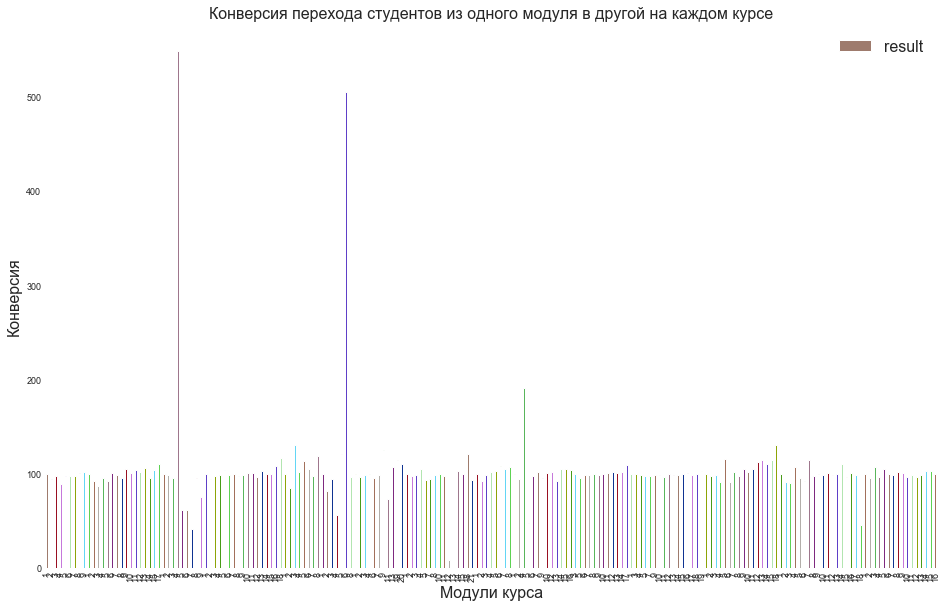

In [118]:
ax = converse.plot.bar(x='module_number', y='result', rot=90, width = 0.4, color = np.random.rand(15, 3))
ax.set_xlabel('Модули курса')
ax.set_ylabel('Конверсия')
plt.title('Конверсия перехода студентов из одного модуля в другой на каждом курсе')
ax.tick_params(axis='both', which='major', labelsize=9)
# Убираем рамку
for spine in plt.gca().spines.values(): 
    spine.set_visible(False)

**4.3 Горизонтальный bar-chart, отражающий конверсию перехода студентов из одного модуля в другой на каждом курсе(15 графиков)**

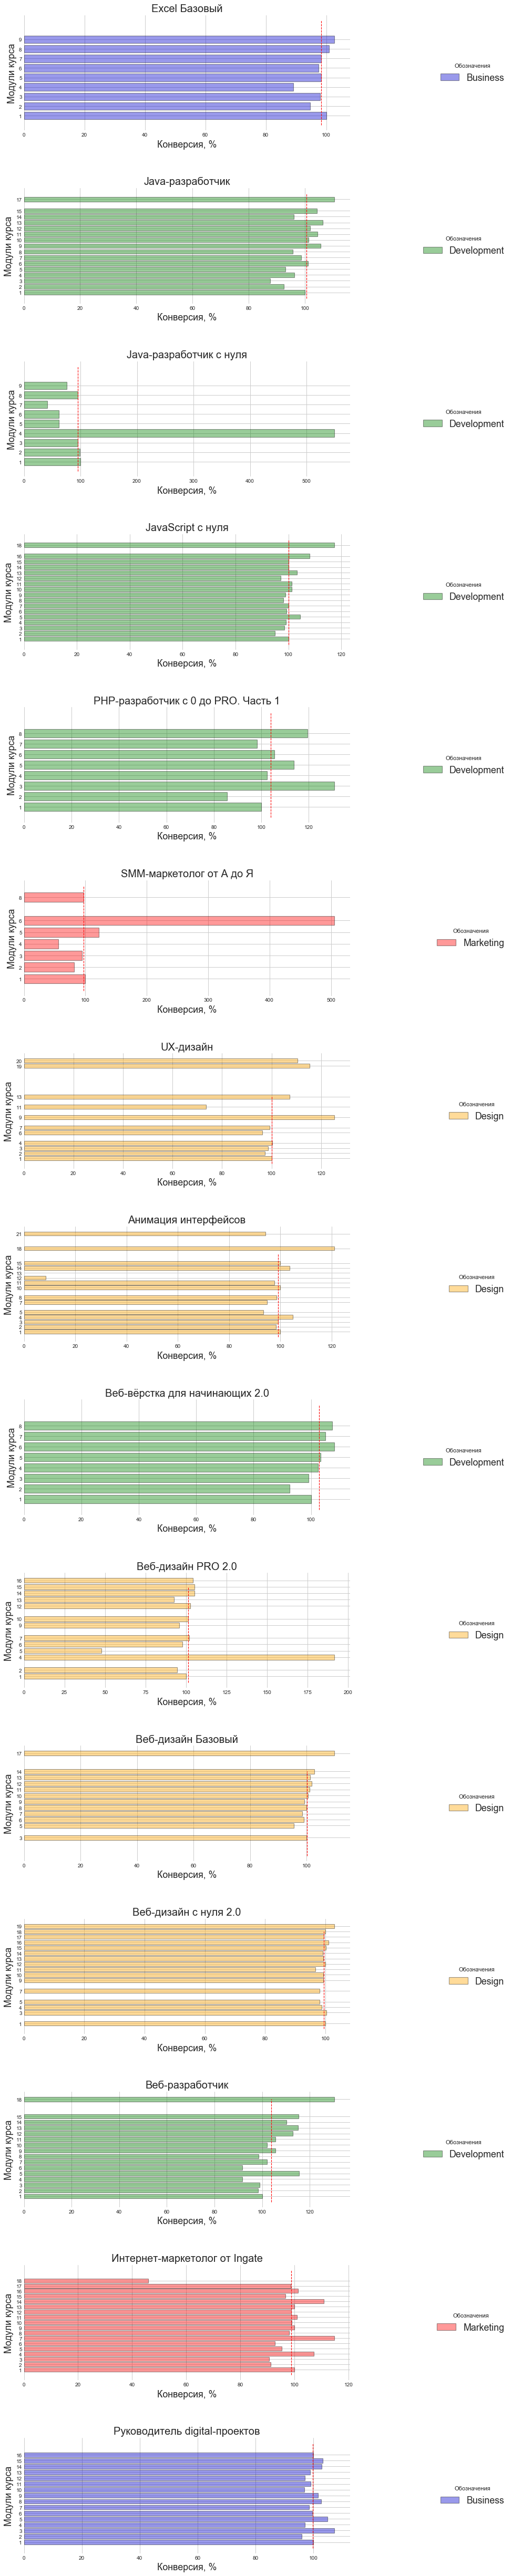

In [119]:
conv_pivot = converse.pivot_table(index = 'module_title', columns = 'title', values = 'result')
fig = plt.figure(figsize=(10, 80), dpi=80)
#Создаем список цветов для направлений, а также вспомогательный датафрейм для легенды
color_list = {'Business':'mediumblue', 'Development':'green', 'Marketing':'red', 'Design':'orange'}
sup_df = main.groupby(['field','title'],as_index=False)['module_title'].count()
for i,val in enumerate(conv_pivot):
    df = converse[converse['title']== conv_pivot.columns[i]]
    ax = fig.add_subplot(15, 1, i+1)
    ax.barh(df['module_number'], df['result'], edgecolor='k',label = sup_df[sup_df.title==val].iloc[0,0], alpha=0.4,color = color_list[sup_df[sup_df.title==val].iloc[0,0]])
    ax.set_ylabel('Модули курса')
    ax.set_xlabel('Конверсия, %')
    ax.tick_params(axis='both', which='major', labelsize=9)
    plt.yticks(df['module_number'])
    ax.grid(linewidth = 0.9 )
    plt.title(conv_pivot.columns[i],fontdict={'fontsize':18})
    ax.vlines(x= df['result'].median(axis=0), ymin = 0, ymax= len(df['result'])+2, linestyle = '--',linewidth = 1, color = 'r')
    for spine in plt.gca().spines.values(): 
        spine.set_visible(False)
    plt.legend(      
               loc="center right",        
               borderaxespad=4,         
               title="Обозначения", bbox_to_anchor=(1.6, 0.5), framealpha = 0.1)
plt.subplots_adjust(wspace=0.5, hspace = 0.5)

**Описание полученных метрик:**

Исходя из формулы конверсии будем считать, что конверсия меньше 100% говорит о проблемах в текущем модуле, а конверсия больше 100% о том, что предыдущий модуль является проблемным.    
Excel Базовый  - можно считать что проблемных модулей нет, так как конверсия отклонение конверсии составляет менее 10%   
Java-разработчик - обратить внимание на 3-й модуль (конверсия 87%)  
Java-разработчик c нуля - проблемы с 3-м модулем, так как конверсия 4го модуля 549%, также стоит обратить внимание
на 5,6,7 модули   
JavaScript с нуля - проблемных модулей нет    
PHP-разработчик с 0 до PRO. Часть 1    - 2 и 4 модули  
SMM-маркетолог от А до Я  - 2, 4 и 5 модули  
UX-дизайн  - 11 и 19 модули    
Анимация интерфейсов - 12 модуль(начали 3 человека, но не сдал никто)
Веб-вёрстка для начинающих 2.0 - 2, 5 модули      
Веб-дизайн PRO 2.0 - 2, 5 и 13 модули      
Веб-дизайн Базовый - проблемных модулей нет            
Веб-дизайн с нуля 2.0 - проблемных модулей нет             
Веб-разработчик - 4, 6, 11 и 12 модули     
Интернет-маркетолог от Ingate  - 3, 6 и 14 модули             
Руководитель digital-проектов - проблемных модулей нет      